In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
%%time

animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 2min 23s, sys: 429 ms, total: 2min 24s
Wall time: 2min 24s


In [3]:
shuffle_calculator = result[0]
df_index = list(range(len(shuffle_calculator.shuffle_dfs)))
df_columns = list(range(len(shuffle_calculator.shuffle_dfs[0].columns) ** 2))
df = pd.DataFrame(index=df_index, columns=df_columns)
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for index, shuffle_df in enumerate(shuffle_calculator.shuffle_dfs):
    df.iloc[index, :] = shuffle_df.to_numpy().ravel()
    
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.581639,0.044771,-0.014179,-0.011539,0.050396,-0.004747,0.041257,-0.01632,-0.013736,-0.008514,...,-0.002486,0.001539,-0.012208,-0.010855,-0.004329,-0.004055,0.004987,-0.005343,-0.013983,0.411784
1,0.436449,-0.015576,-0.00063,0.040477,0.006067,-0.008085,-0.006195,-0.004713,-0.011035,0.000047,...,0.008933,0.00202,-0.01295,0.002365,-0.008372,0.016705,0.011558,0.006331,0.046352,0.394862
2,0.42186,0.031109,0.006425,0.043288,0.025858,0.022584,0.026453,0.003918,-0.006738,0.001447,...,0.009546,0.049999,0.02448,0.032395,0.002638,0.029698,-0.000483,0.03843,-0.00552,0.394975
3,0.427361,0.008949,-0.013356,0.004503,0.018093,-0.00616,-0.013458,-0.005396,0.00259,-0.002011,...,0.026584,-0.000093,0.05432,0.028738,0.003034,-0.009396,0.039677,0.027491,-0.009523,0.379699
4,0.535973,0.055507,0.020052,0.035454,-0.004951,-0.006421,0.010734,0.001774,0.06712,0.060821,...,0.020923,0.022775,0.004088,-0.012226,0.012626,0.098982,-0.014969,-0.007909,-0.009409,0.443228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.426204,0.006812,-0.008329,-0.010761,0.015264,-0.001817,0.001256,-0.004188,-0.009389,-0.010842,...,0.027815,0.003925,0.165988,0.003496,0.001081,0.020747,0.000838,0.031967,0.009405,0.443034
996,0.418184,-0.00492,0.006448,0.039746,-0.011668,-0.005359,-0.010575,0.005099,0.014218,0.031867,...,0.024329,0.047939,-0.006384,0.027913,-0.011787,0.007782,0.028851,0.040374,-0.003345,0.414082
997,0.464003,0.042111,0.025006,-0.000138,-0.002905,-0.009102,0.002491,-0.011149,-0.004272,0.059022,...,0.014092,-0.001721,0.008229,0.036553,-0.003401,-0.008566,0.004656,-0.001003,0.017609,0.361605
998,0.530034,0.054771,-0.012449,0.01387,0.022451,0.13455,-0.011205,-0.001318,0.03336,0.021865,...,0.055543,0.049724,0.004241,0.00416,0.016839,0.020972,0.02211,0.045559,-0.005152,0.36367


(array([  4.,   2.,   7.,  30.,  51.,  66., 108., 116., 116., 127., 100.,
         85.,  63.,  41.,  38.,  25.,  11.,   3.,   5.,   2.]),
 array([0.276554595358541, 0.2960933951864798, 0.31563219501441864,
        0.33517099484235746, 0.35470979467029623, 0.37424859449823505,
        0.3937873943261739, 0.41332619415411265, 0.43286499398205147,
        0.4524037938099903, 0.4719425936379291, 0.49148139346586794,
        0.5110201932938068, 0.5305589931217456, 0.5500977929496844,
        0.5696365927776232, 0.5891753926055621, 0.6087141924335009,
        0.6282529922614397, 0.6477917920893784, 0.6673305919173173],
       dtype=object),
 <BarContainer object of 20 artists>)

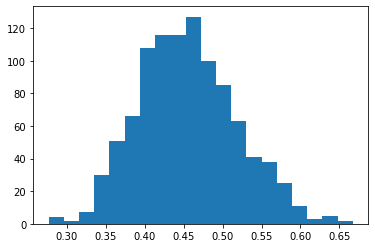

In [5]:
plt.hist(df.iloc[:, 0], bins=20)

(array([117., 261., 168., 116.,  84.,  66.,  55.,  38.,  26.,  26.,  13.,
         11.,   6.,   6.,   2.,   0.,   2.,   1.,   0.,   2.]),
 array([-0.01967798377601531, -0.010169222691033677, -0.000660461606052043,
        0.008848299478929591, 0.018357060563911225, 0.027865821648892862,
        0.03737458273387449, 0.04688334381885612, 0.05639210490383776,
        0.06590086598881939, 0.07540962707380103, 0.08491838815878266,
        0.0944271492437643, 0.10393591032874594, 0.11344467141372755,
        0.12295343249870919, 0.13246219358369082, 0.14197095466867246,
        0.1514797157536541, 0.16098847683863574, 0.17049723792361735],
       dtype=object),
 <BarContainer object of 20 artists>)

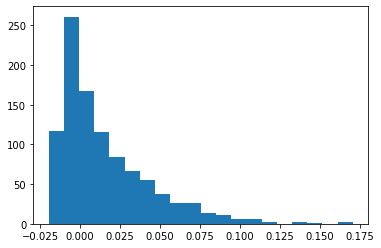

In [6]:
plt.hist(df.iloc[:, 1], bins=20)

(array([ 46., 211., 232., 207., 107.,  65.,  42.,  35.,  14.,  14.,   5.,
          7.,   3.,   3.,   2.,   2.,   2.,   1.,   1.,   1.]),
 array([-0.01900908296821797, -0.012981484144299761, -0.006953885320381553,
        -0.0009262864964633445, 0.0051013123274548655,
        0.011128911151373076, 0.017156509975291282, 0.023184108799209496,
        0.029211707623127702, 0.03523930644704591, 0.04126690527096412,
        0.047294504094882325, 0.05332210291880053, 0.05934970174271874,
        0.06537730056663696, 0.07140489939055517, 0.07743249821447337,
        0.08346009703839158, 0.08948769586230979, 0.095515294686228,
        0.10154289351014621], dtype=object),
 <BarContainer object of 20 artists>)

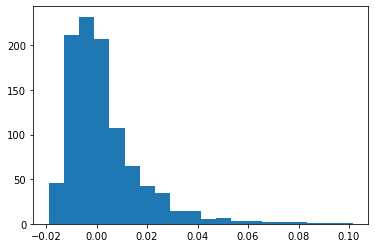

In [7]:
plt.hist(df.iloc[:, 2], bins=20)

(array([188., 349., 199., 129.,  53.,  36.,  17.,  11.,   8.,   2.,   2.,
          1.,   1.,   2.,   2.]),
 array([-0.017544728939076087, -0.00771491441515402, 0.002114900108768046,
        0.011944714632690114, 0.02177452915661218, 0.03160434368053425,
        0.04143415820445631, 0.051263972728378376, 0.06109378725230044,
        0.0709236017762225, 0.08075341630014457, 0.09058323082406664,
        0.10041304534798871, 0.11024285987191078, 0.12007267439583284,
        0.12990248891975492], dtype=object),
 <BarContainer object of 15 artists>)

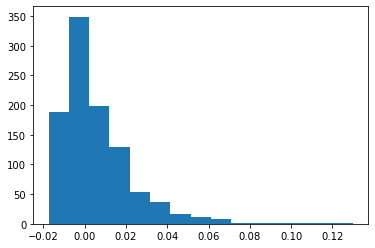

In [8]:
plt.hist(df.iloc[:, 3], bins=15)

(array([208., 360., 202., 107.,  48.,  32.,  22.,   4.,   9.,   2.,   2.,
          2.,   0.,   1.,   1.]),
 array([-0.01889962914408111, -0.008560978335897279, 0.0017776724722865511,
        0.012116323280470381, 0.02245497408865421, 0.03279362489683804,
        0.04313227570502187, 0.0534709265132057, 0.06380957732138953,
        0.07414822812957336, 0.08448687893775719, 0.09482552974594102,
        0.10516418055412485, 0.11550283136230868, 0.1258414821704925,
        0.13618013297867634], dtype=object),
 <BarContainer object of 15 artists>)

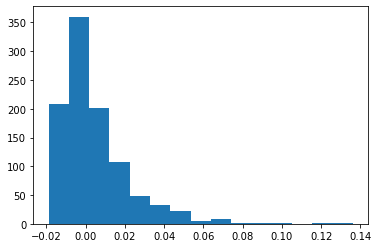

In [9]:
plt.hist(df.iloc[:, 4], bins=15)

In [10]:
import math
math.log2(10000) + 1

14.287712379549449

In [11]:
mc = MonteCarloResamplingOperator(shuffle_calculator)
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c62b1c2b645735b1deaf0e8128cf2b68 NOW.


In [12]:
%%time

items = df.iloc[:, 1]
item_size = len(items)
min_value = items.min()
items -= min_value
print(items)
print(items.min())
stan_data = {
    'N': item_size,
    'Y': items.values.tolist()
}

fit = mc.model.sampling(data=stan_data, iter=3000, chains=3, warmup=1000)

0      0.064449
1      0.004102
2      0.050787
3      0.028627
4      0.075185
         ...   
995     0.02649
996    0.014758
997    0.061789
998    0.074449
999    0.024423
Name: 1, Length: 1000, dtype: object
0.0
CPU times: user 1.55 s, sys: 4.01 ms, total: 1.56 s
Wall time: 1.55 s


(array([199., 296., 167., 113.,  72.,  58.,  34.,  26.,  16.,   7.,   7.,
          0.,   2.,   1.,   2.]),
 array([0.0, 0.012678348113308844, 0.025356696226617688,
        0.038035044339926535, 0.050713392453235376, 0.06339174056654422,
        0.07607008867985307, 0.08874843679316191, 0.10142678490647075,
        0.11410513301977959, 0.12678348113308843, 0.13946182924639727,
        0.15214017735970614, 0.16481852547301498, 0.17749687358632382,
        0.19017522169963266], dtype=object),
 <BarContainer object of 15 artists>)

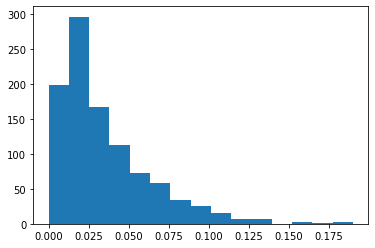

In [13]:
plt.hist(items, bins=15)

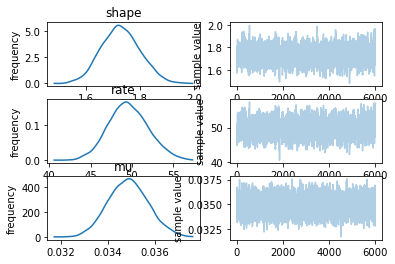

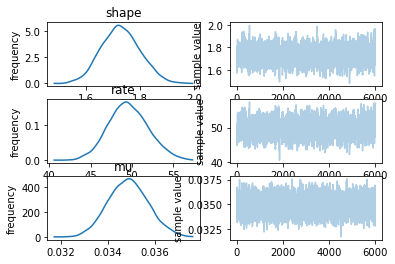

In [14]:
fit.plot()

In [15]:
fit

Inference for Stan model: anon_model_c62b1c2b645735b1deaf0e8128cf2b68.
3 chains, each with iter=3000; warmup=1000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=6000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
shape   1.73  1.8e-3   0.07   1.59   1.68   1.73   1.78   1.87   1603    1.0
rate    49.6    0.06   2.39  45.06  47.96  49.51  51.19  54.51   1475    1.0
mu      0.03  1.1e-5 8.4e-4   0.03   0.03   0.03   0.04   0.04   5609    1.0
lp__  2435.2    0.02   0.98 2432.6 2434.8 2435.5 2435.9 2436.1   1745    1.0

Samples were drawn using NUTS at Tue Aug 17 03:53:35 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [16]:
np.mean(fit.extract('mu')['mu']) + min_value

0.015188116566942002

In [17]:
result[1]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.388989,0.036405,-0.006136,-0.005001,0.021087,-0.001956,-0.000979,0.020496,0.007864,0.012419,...,-0.01352,0.006987,0.008965,0.026201,-0.009104,-0.017803,-0.006084,-0.016866,-0.008792,-0.00446
1,0.036405,0.456106,-0.007674,-0.000435,-0.00595,0.009615,0.037333,0.013959,-0.008959,0.001232,...,-0.006474,-0.00795,-0.014747,-0.005806,-0.011344,-0.016426,0.006326,-0.017691,0.004711,0.016426
2,-0.006136,-0.007674,0.32916,-0.005633,0.000593,0.006555,-0.009793,-0.005318,-0.013406,-0.005667,...,0.049704,0.006587,-0.008749,0.039543,0.013346,-0.005763,0.005368,0.055891,-0.00362,-0.013696
3,-0.005001,-0.000435,-0.005633,0.228293,-0.011918,-0.003498,0.008012,-0.011906,-0.011169,-0.001989,...,-0.014404,-0.011722,0.00099,-0.008433,0.005843,-0.006711,-0.003482,0.023854,-0.005492,0.036426
4,0.021087,-0.00595,0.000593,-0.011918,0.361437,-0.006917,0.020925,-0.006792,-0.003823,0.002198,...,0.000792,-0.009594,-0.010663,-0.012105,0.009119,-0.018604,0.018805,-0.011884,0.020882,-0.000836
5,-0.001956,0.009615,0.006555,-0.003498,-0.006917,0.215059,-0.003046,-0.009029,-0.007219,-0.007059,...,-0.010727,-0.004436,0.001387,0.021054,0.027115,0.017126,0.002887,-0.013547,-0.001365,-0.010619
6,-0.000979,0.037333,-0.009793,0.008012,0.020925,-0.003046,0.261483,0.013475,0.009553,-0.00787,...,-0.006,0.001891,-0.014624,0.034804,0.009134,-0.009511,0.018252,-0.008236,0.005046,0.013687
7,0.020496,0.013959,-0.005318,-0.011906,-0.006792,-0.009029,0.013475,0.269914,-0.001216,-0.006935,...,0.008134,0.002108,0.007869,0.063274,-0.007434,-0.009931,-0.00511,0.006981,-0.000082,0.000195
8,0.007864,-0.008959,-0.013406,-0.011169,-0.003823,-0.007219,0.009553,-0.001216,0.351965,0.021141,...,0.012154,0.005552,0.005016,-0.012865,-0.011517,-0.002505,-0.006146,-0.000709,0.009962,-0.003427
9,0.012419,0.001232,-0.005667,-0.001989,0.002198,-0.007059,-0.00787,-0.006935,0.021141,0.455651,...,0.005413,0.029706,0.008772,0.018549,-0.006,-0.005689,-0.007016,0.004573,-0.013367,-0.001035


In [18]:
result[2]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.459531,0.011822,0.000237,0.004032,0.005406,0.000624,0.001142,0.005518,0.012499,0.016335,...,0.017794,0.020973,0.012435,0.006781,0.007457,0.006145,0.005446,0.012049,0.010169,0.003729
1,0.011822,0.422289,0.001752,-0.000902,0.002925,0.005772,0.005115,0.003843,0.001429,0.018185,...,0.01435,0.006394,0.023399,0.002048,0.006485,0.005189,0.005828,0.009492,0.017653,0.004292
2,0.000237,0.001752,0.30113,0.002772,0.007782,0.002176,-0.000413,0.005048,0.000289,0.000569,...,0.001673,-0.00005,0.001662,0.000547,-0.000917,-0.001201,0.002221,0.002829,-0.001197,0.001436
3,0.004032,-0.000902,0.002772,0.294925,0.003385,0.004932,0.005183,0.003692,0.003421,0.008549,...,0.005078,0.008478,0.001402,0.002251,0.003336,0.00194,0.001102,0.0049,0.001469,0.003805
4,0.005406,0.002925,0.007782,0.003385,0.329438,0.012222,0.004957,0.004197,-0.000011,0.00215,...,-0.000284,0.00255,0.004624,-0.000198,0.00097,0.00078,0.009202,0.000277,0.007728,-0.000049
5,0.000624,0.005772,0.002176,0.004932,0.012222,0.279232,0.004093,0.008366,0.001708,0.005009,...,0.00489,0.002376,0.004928,0.000108,-0.00003,0.003781,0.001354,0.005356,0.0044,-0.000214
6,0.001142,0.005115,-0.000413,0.005183,0.004957,0.004093,0.332999,0.015215,-0.000682,0.011432,...,0.000972,0.008316,0.004718,0.001984,0.007256,0.0011,0.001814,0.004163,0.009649,-0.000439
7,0.005518,0.003843,0.005048,0.003692,0.004197,0.008366,0.015215,0.297835,0.005966,0.026095,...,0.015194,0.017039,0.007307,0.004799,0.003018,0.009627,0.005622,0.019505,0.013026,0.003013
8,0.012499,0.001429,0.000289,0.003421,-0.000011,0.001708,-0.000682,0.005966,0.413062,0.014466,...,0.017593,0.012948,0.010223,0.000346,0.009879,0.004795,0.004635,0.006133,0.007262,0.005388
9,0.016335,0.018185,0.000569,0.008549,0.00215,0.005009,0.011432,0.026095,0.014466,0.407269,...,0.037779,0.027549,0.025803,0.004334,0.010328,0.028327,0.006501,0.023071,0.01743,0.007347


ValueError: Must pass 2-d input. shape=()

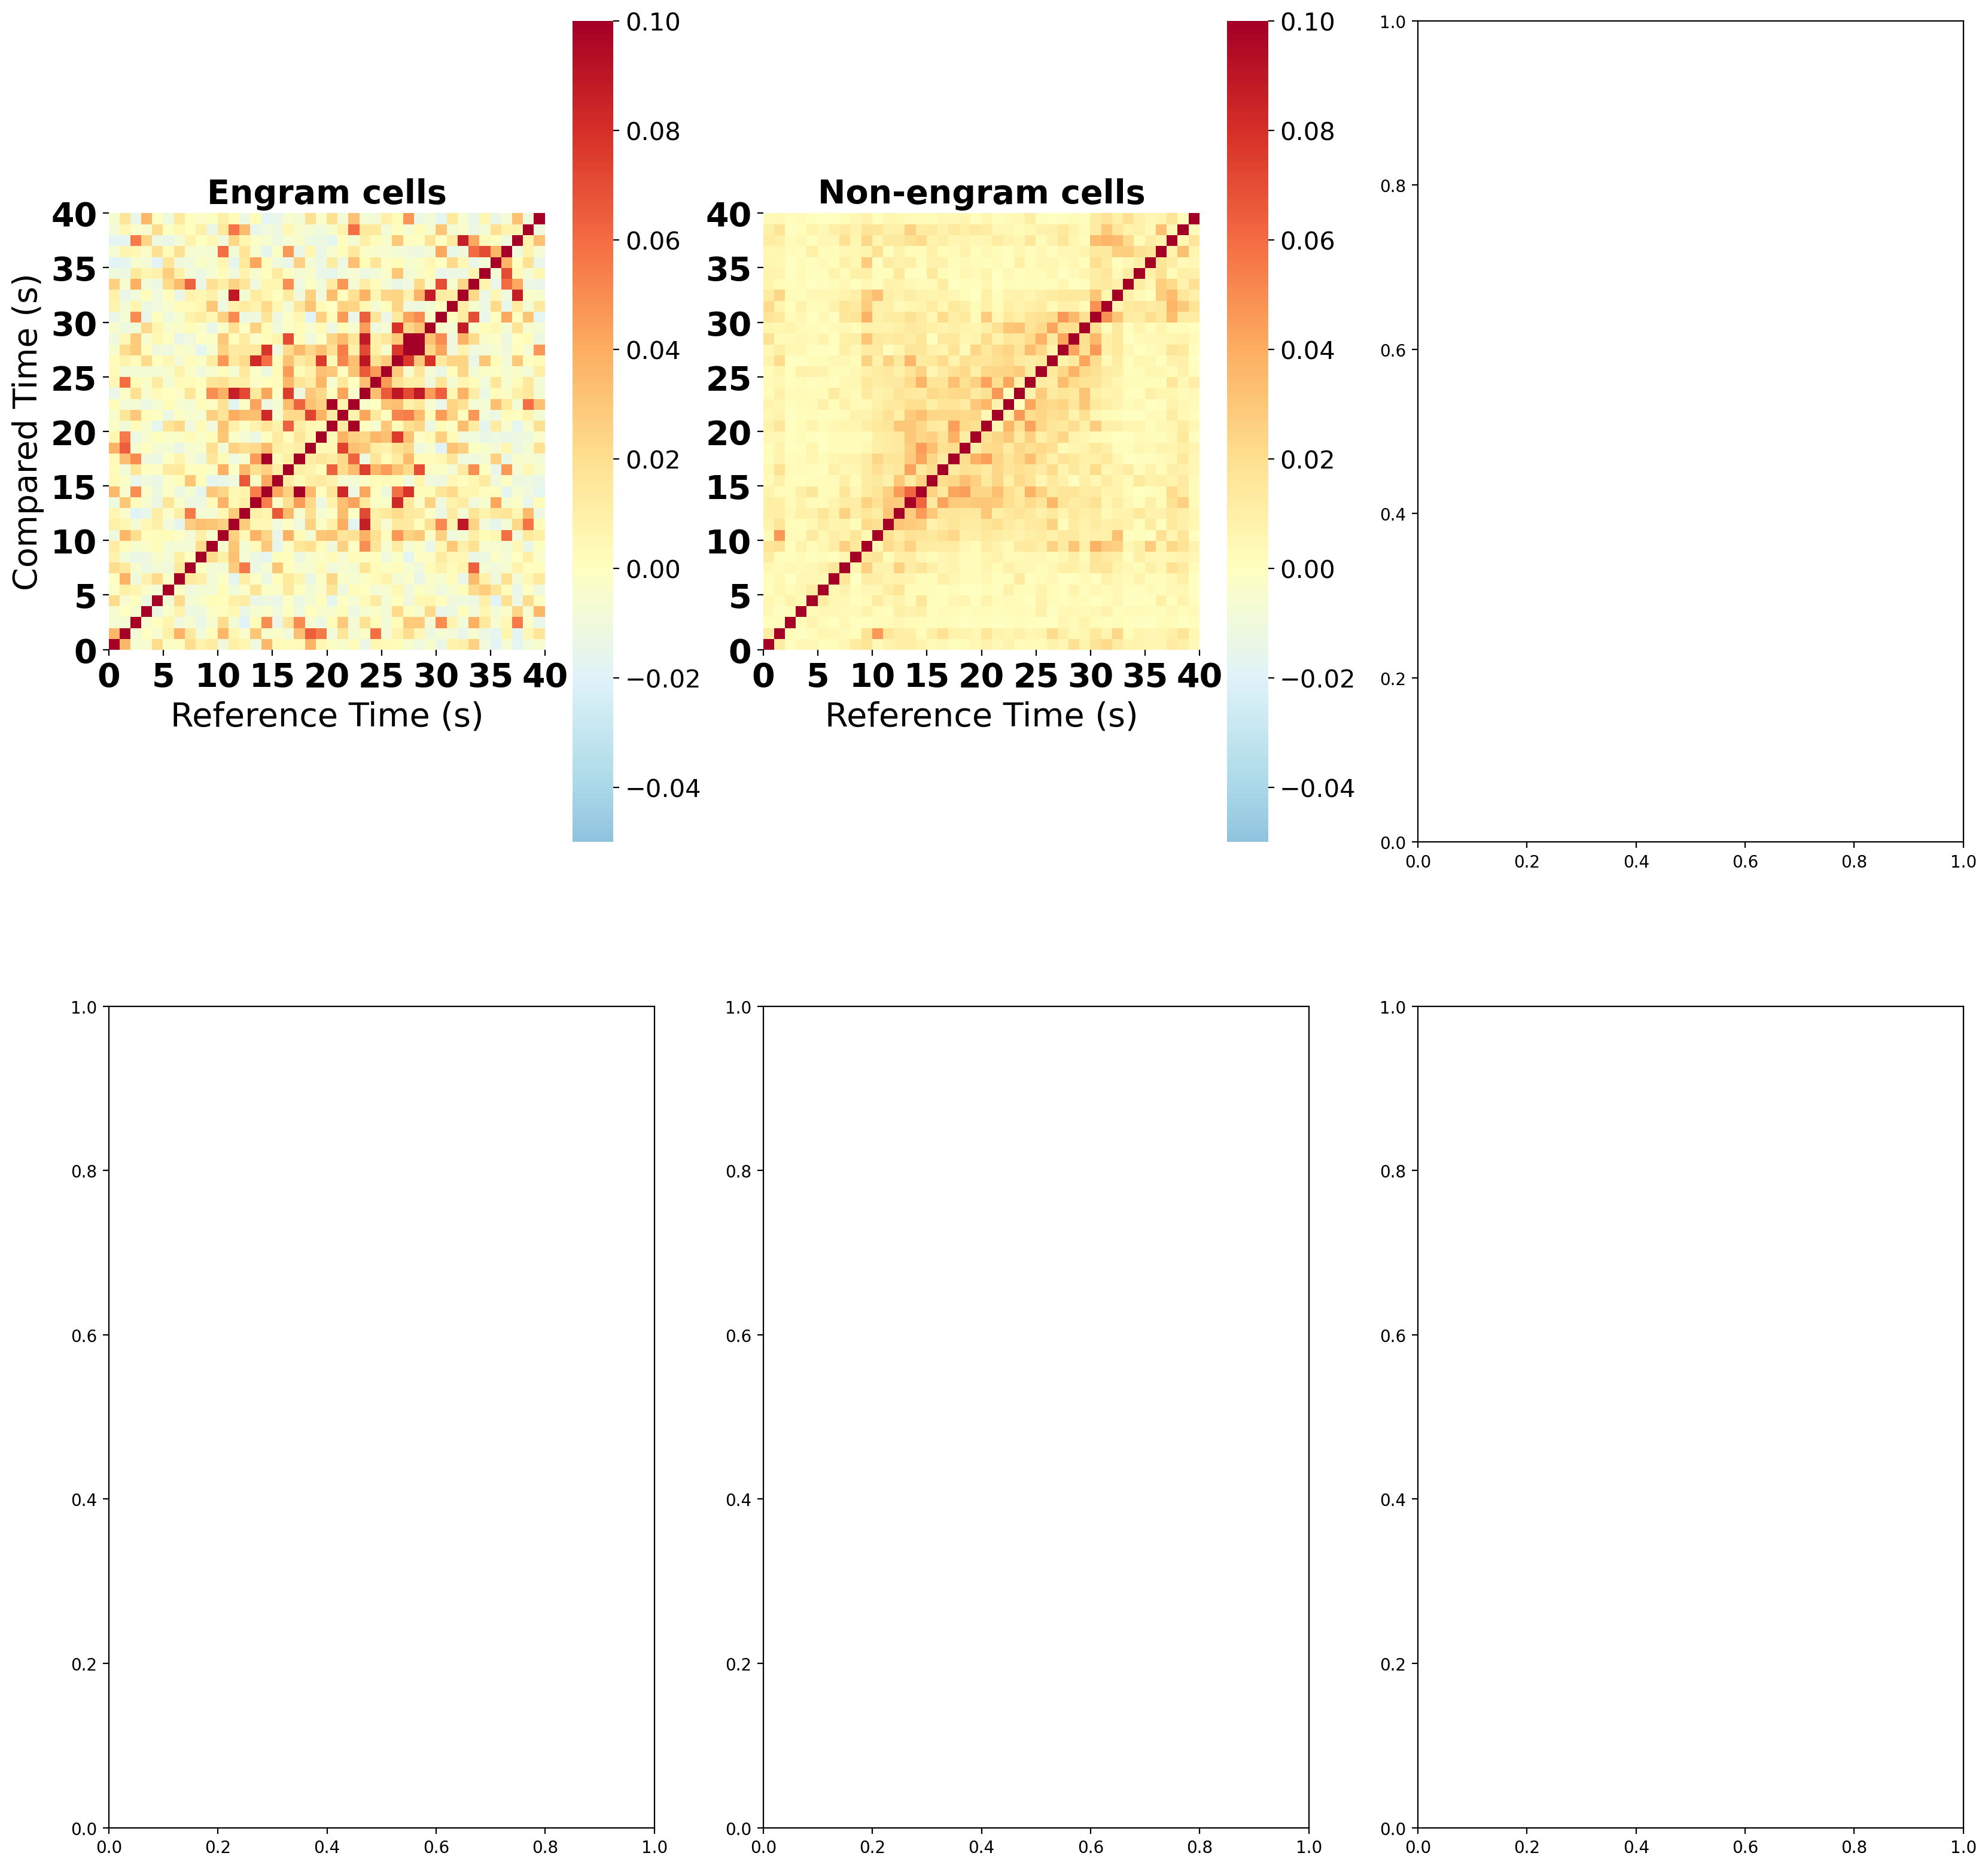

In [19]:
TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

In [ ]:
#resampling = mc.resampling(df)
#resampling

In [ ]:
#resampling.reshape(40, 40)